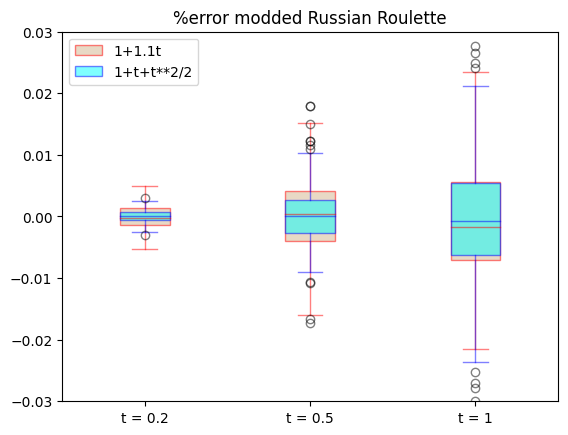

In [4]:
from random import random
from math import exp
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, alpha = 0.5)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
    return bp

def approx_sol(t):
    return 1+1*1*t    

def Y(t):
    k = 1-t if t<1 else 0
    return (1+t*Y(random()*t)-k*approx_sol(t))/(1-k) if random()<1-k else approx_sol(t)

def Y1(t):
    k = 1-t if t<1 else 0
    return (1+t*Y1(random()*t)-k*(1+t+t**2/2))/(1-k) if random()<1-k else 1+t+t**2/2

data = []
data1 = []
ts= [0.2,0.5,1]
for t in ts:
    nsim = 5*10**2
    sols = []
    sols1 = []

    for _ in range(500):
        sol = 0
        sol1 = 0
        for _ in range(nsim):
            sol += Y(t)/nsim
            sol1 += Y1(t)/nsim
        sols.append((sol - exp(t))/exp(t))
        sols1.append((sol1 - exp(t))/exp(t))
    data.append(sols)
    data1.append(sols1)

fig, ax = plt.subplots()
bp1 = box_plot(data, 'red', 'tan')
bp2 = box_plot(data1, 'blue', 'cyan')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['1+1.1t', '1+t+t**2/2'])
ax.set_ylim(-0.03, 0.03)
plt.title("%error modded Russian Roulette")
plt.xticks(ticks=[1,2,3],labels = [f"t = {t}" for t in ts])
plt.show()

the approximate solution in modded russian roulette may also be stochastic or even obtained by Monte Carlo.

In [152]:
#still need to fix this
from random import randint
memo1 = []
memo2 = []
def x1memo_control(x1control, x2control):
    r = randint(0,3)
    if r == 0:
        res = -0.5*x1memo_control(x1control,x2control) - x1control/2 +1
    elif r==1:
        res = 0.5*x2memo_control(x1control,x2control) - x1control/2 +1
    else:
        res = 1+ x1control
    memo1.append(res)
    return res
    
def x2memo_control(x1control,x2control):
    r = randint(0,3)
    if r == 0:
        res= 0.5*x1memo_control(x1control,x2control) - x2control/2 +3/4
    elif r==1:
        res= 0.5*x2memo_control(x1control,x2control) -x2control/2 +3/4
    else:
        res=  x2control
    memo2.append(res)
    return res

x1control = 0
x2control = 0
# you can have finer control over the outer and inner iteration
for _ in range(12):
    memo1 = []
    memo2 = []
    for _ in range(10):
        x1memo_control(x1control,x2control)
        x2memo_control(x1control,x2control)
    x1control = sum(memo1)/len(memo1)
    x2control = sum(memo2)/len(memo2)

print(x1control)
print(x2control)


1.4770363396263595
1.5174166980194759
